In [10]:
import sys
# Assuming we are in the notebook directory add this so that we can import the library
sys.path.append('..')

import time

import numpy as np
import dask
import GPy
from abcpy.core import *
from abcpy.distributions import *
from abcpy.examples.ma2 import *
from abcpy.methods import *
from distributed import Client
from dask.dot import dot_graph
from functools import partial

import matplotlib
import matplotlib.pyplot as plt

#matplotlib.style.use('ggplot')
#%matplotlib inline


In [11]:
n = 1000
t1 = 0.6
t2 = 0.2

# Set up observed data y
latents = np.random.randn(n+2)
y = MA2(n, 1, t1, t2, latents=latents)

# Plot
if False:
    plt.figure(figsize=(11, 6))
    plt.plot(np.arange(0,n),y[0,:])
    plt.scatter(np.arange(-2,n), latents);

In [40]:
# Set up the simulator
simulator = partial(MA2, n)

# Set up autocovariance summaries
ac1 = partial(autocov, 1)
ac2 = partial(autocov, 2)

# Specify the graphical model
t1 = Prior('t1', 'uniform', 0, 1)
#t2 = Prior('t2', 'uniform', 0, 1)
Y = Simulator('MA2', simulator, t1, t2, observed=y)
S1 = Summary('S1', ac1, Y)
S2 = Summary('S2', ac2, Y)
d = Discrepancy('d', distance, S1, S2)

# Specify the number of simulations
n_sim = 10
n_batch = 2

In [41]:
bolfi = BOLFI(10, d, [t1], batch_size=n_batch, n_surrogate_samples=n_sim)
lik = bolfi.create_surrogate_likelihood()

/home/akangasr/abcpy/.venv/lib/python3.4/site-packages/distributed/deploy/local.py - INFO - To start diagnostics web server please install Bokeh
GP - INFO - initializing Y
GP - INFO - initializing inference method
GP - INFO - adding kernel and likelihood as parameters


Sampling 10 samples in batches of 2
Observed: [[ 74.21375173]] at [[ 0.72645248]]
Observed: [[ 56.08204988]] at [[ 0.49041187]]


 /home/akangasr/abcpy/.venv/lib/python3.4/site-packages/paramz/transformations.py:109: RuntimeWarning:overflow encountered in expm1


Observed: [[ 337.00414566]] at [[ 0.01738841]]
Observed: [[ 197.83260073]] at [[ 0.09632728]]
Observed: [[ 121.93030553]] at [[ 1.11177341]]
Observed: [[ 123.05871511]] at [[ 1.10649155]]


 /home/akangasr/abcpy/.venv/lib/python3.4/site-packages/GPy/kern/src/stationary.py:160: RuntimeWarning:overflow encountered in true_divide
 /home/akangasr/abcpy/.venv/lib/python3.4/site-packages/GPy/kern/src/stationary.py:198: RuntimeWarning:invalid value encountered in multiply


Observed: [[ 82.34861915]] at [[ 0.88177341]]
Observed: [[ 83.72714164]] at [[ 0.87959248]]
Observed: [[ 61.85487395]] at [[ 0.60679671]]
Observed: [[ 53.81433661]] at [[ 0.60285963]]


In [42]:
async_bolfi = BOLFI(10, d, [t1], sync=False, batch_size=n_batch, n_surrogate_samples=n_sim)
lik = async_bolfi.create_surrogate_likelihood()

/home/akangasr/abcpy/.venv/lib/python3.4/site-packages/distributed/deploy/local.py - INFO - To start diagnostics web server please install Bokeh
GP - INFO - initializing Y
GP - INFO - initializing inference method
GP - INFO - adding kernel and likelihood as parameters


Sampling 10 samples asynchronously 2 samples in parallel
Observed: [[ 62.7834561]] at [[ 0.76235583]]
Observed: [[ 120.59820955]] at [[ 1.0102055]]


 /home/akangasr/abcpy/.venv/lib/python3.4/site-packages/paramz/transformations.py:109: RuntimeWarning:overflow encountered in expm1


Observed: [[ 324.77627657]] at [[ 0.01216689]]
Observed: [[ 112.73959314]] at [[ 1.01189386]]
Observed: [[ 307.44278454]] at [[ 0.03843445]]
Observed: [[ 184.67421849]] at [[ 1.20156101]]


 /home/akangasr/abcpy/.venv/lib/python3.4/site-packages/GPy/kern/src/stationary.py:160: RuntimeWarning:overflow encountered in true_divide
 /home/akangasr/abcpy/.venv/lib/python3.4/site-packages/GPy/kern/src/stationary.py:198: RuntimeWarning:invalid value encountered in multiply


Observed: [[ 114.72449143]] at [[ 1.06126707]]
Observed: [[ 169.88860919]] at [[ 1.07751912]]
Observed: [[ 11.55431726]] at [[ 0.67807233]]
Observed: [[ 4.93202064]] at [[ 0.63747086]]


In [43]:
from IPython.display import display
display(bolfi.model.gp)
display(async_bolfi.model.gp)

GP_regression.,value,constraints,priors
Exponential.variance,45795.8688519,+ve,
Exponential.lengthscale,2.44984507366,+ve,
Gaussian_noise.variance,5.56268464627e-309,+ve,


GP_regression.,value,constraints,priors
Exponential.variance,61484.8706033,+ve,
Exponential.lengthscale,2.43723856019,+ve,
Gaussian_noise.variance,5.56268464627e-309,+ve,


 /home/akangasr/abcpy/.venv/lib/python3.4/site-packages/matplotlib/figure.py:1742: UserWarning:This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.


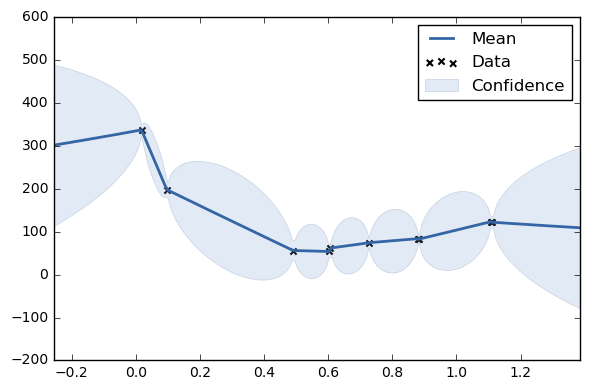

In [44]:
fig = bolfi.model.gp.plot()
GPy.plotting.show(fig)

 /home/akangasr/abcpy/.venv/lib/python3.4/site-packages/matplotlib/figure.py:1742: UserWarning:This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.


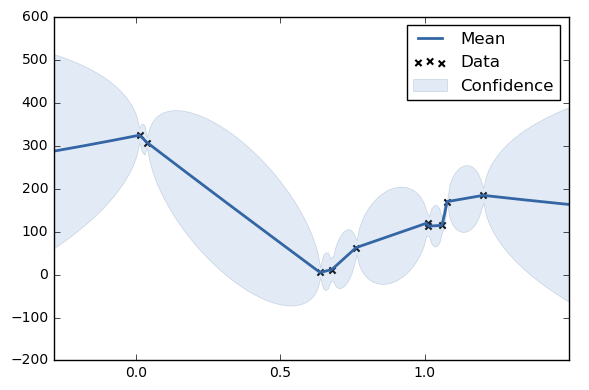

In [45]:
fig = async_bolfi.model.gp.plot()
GPy.plotting.show(fig)